In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [3]:
pd.set_option('display.max_columns', None) #show all columns

In [4]:
df = pd.read_excel('Canada.xlsx',skiprows = 20,
skipfooter =2 , sheet_name = 'Canada by Citizenship')

In [5]:
cols_to_drop = ['Type','Coverage','AREA','REG','DEV']#list of unwanted cols
df.drop(columns = cols_to_drop,inplace = True)#dropping the columns
years = range (1980,2014) #list of years 1900-2013
df.rename({
    'OdName':'Country',
    'AreaName':'Continent',
    'RegName':'Region',
    'DevName':'Status',
},axis=1,inplace =True)  #renaming columns to our preference
df.set_index('Country',inplace =True) #making country as index as each country is unique for
df['Total'] = df[years].sum(axis = 1)#adding a new column from existing data
df.head(3) #show output,first 3 row
#axis 1 = columnwise
#axis 0 = rowwise(default)

,Continent,Region,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [6]:
df.sort_values(by = 'Total', inplace = True , ascending = False)
df.head(10)

,Continent,Region,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5892,6054,6842,7435,5901,4890,5515,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,3655,6250,6814,3959,2785,3956,6205,7982,7057,6208,5884,6169,8129,5918,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,4447,2779,2758,3525,7266,13102,9563,7150,9368,6484,5415,3566,4982,6081,5861,5279,4892,4495,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,2338,2805,2979,2087,2598,3790,3819,3005,3501,3250,4093,4938,7108,7618,9619,7342,7117,5352,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [7]:
df.rename ({'United Kingdom of Great Britain and Northern Ireland':'UK'},inplace=True)

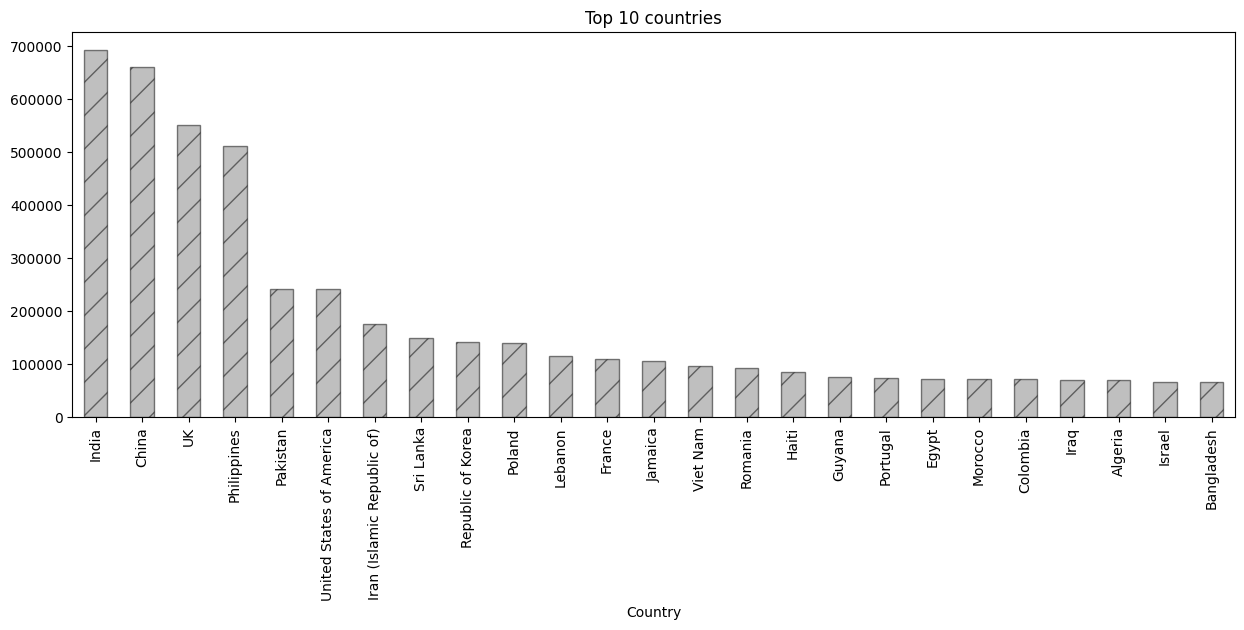

In [8]:
df.head(25)['Total'].plot(kind = 'bar', figsize = (15,5),title = 'Top 10 countries',color = 'grey',alpha = .5, edgecolor = 'black' , hatch = '/')#rot = 45)
plt.savefig('top 25 countries with immigration.jpg',bbox_inches = 'tight') #save graph

In [9]:
df.plot?

   #view all data of plot

Signature:      df.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x000001F64D10A490>
File:           c:\users\saxen\miniconda3\lib\site-packages\pandas\plotting\_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot

In [10]:
#compare india, China ,UK, immigration
countries = ['India','China','UK']
df.loc[countries, years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
UK,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827


<AxesSubplot: >

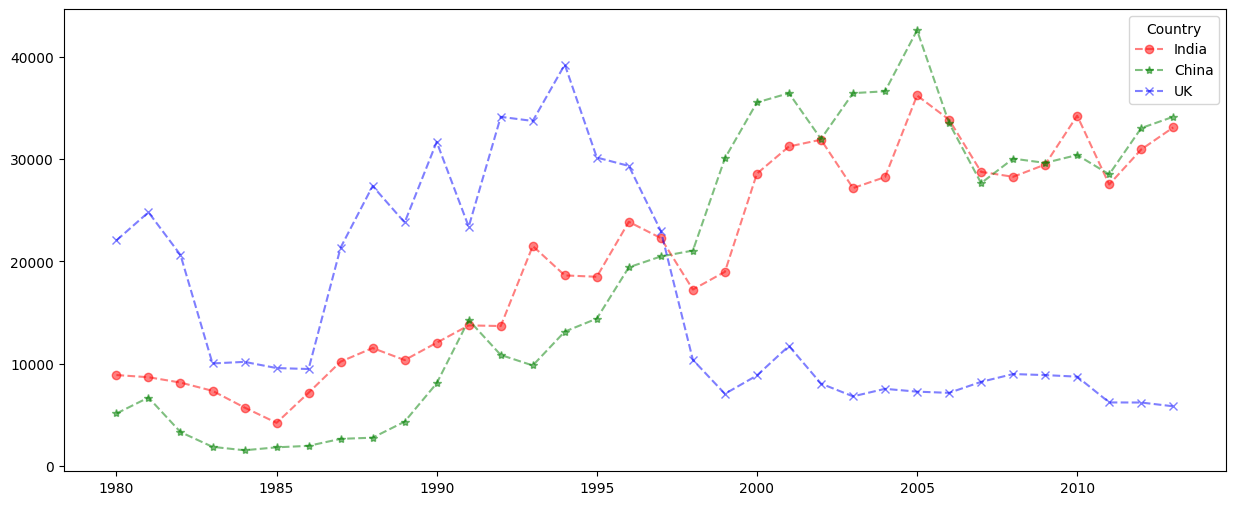

In [11]:
df.loc[countries, years].T.plot(kind = 'line',figsize = (15,6),style = ['ro--','g*--','bx--'],alpha = .5,)

In [12]:
px.funnel(df.head(),x = df.head().index, y = [1980,1990,2000,2010])

line plots


In [13]:
print(plt.style.available)
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<AxesSubplot: title={'center': 'Immigration Trends of Japan to Canada(1980-2013'}, xlabel='Years', ylabel='No. of People'>

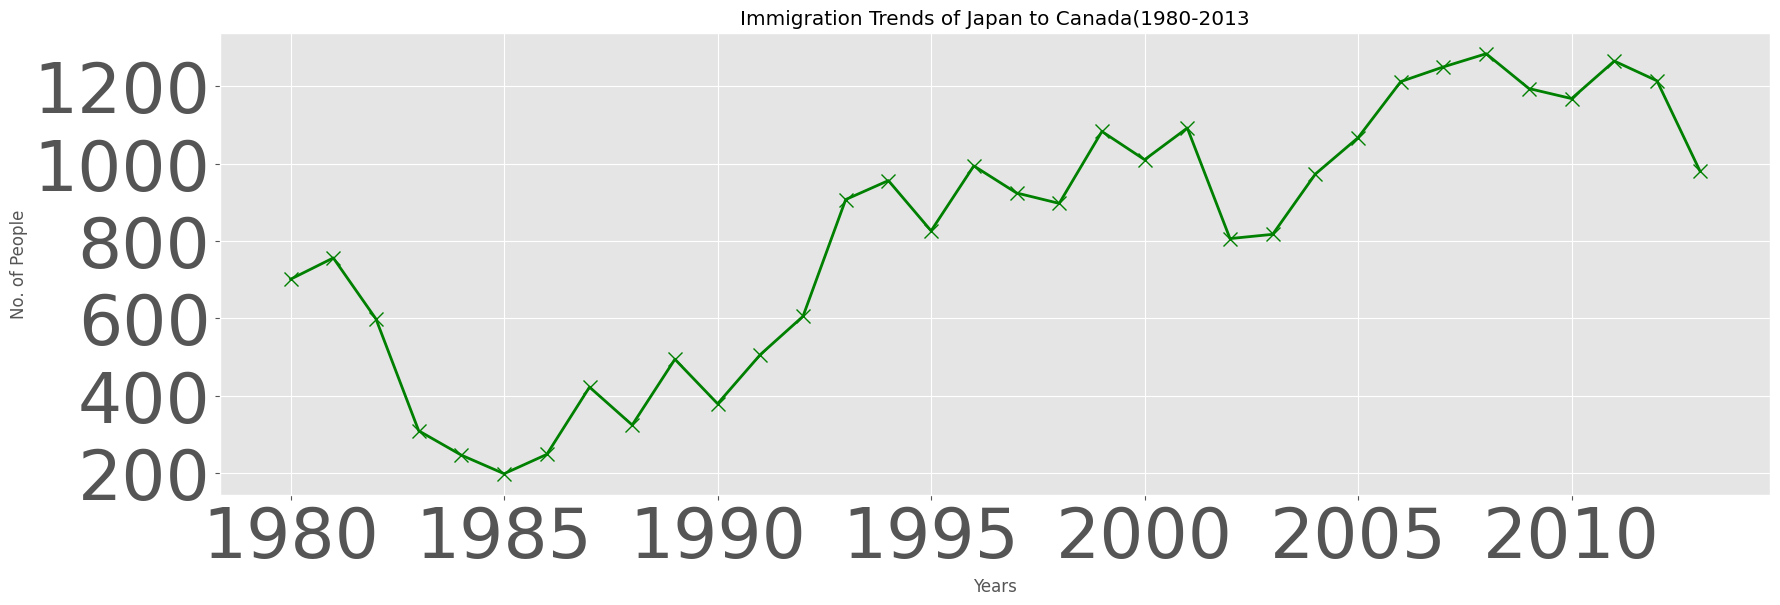

In [14]:
df.loc['Japan',years].plot(linewidth = 2,color = 'green',linestyle = '-',marker = 'x',markersize = 10,figsize = (20,6)
,xlabel = 'Years',ylabel = 'No. of People',fontsize = 50,grid = True,title = 'Immigration Trends of Japan to Canada(1980-2013')

## area plots ###

<AxesSubplot: >

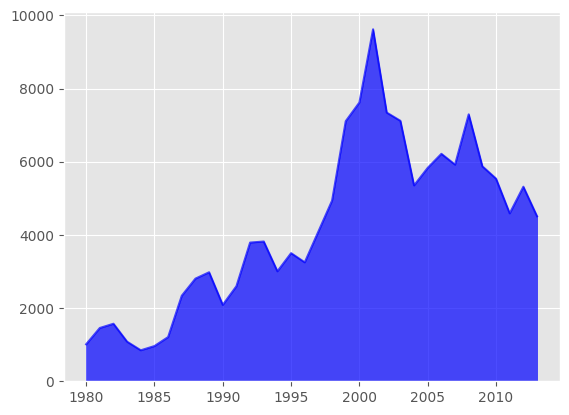

In [15]:
df.loc['Republic of Korea',years].plot(kind = 'area', alpha = .7 , color = 'blue')

array([[<AxesSubplot: >, <AxesSubplot: >]], dtype=object)

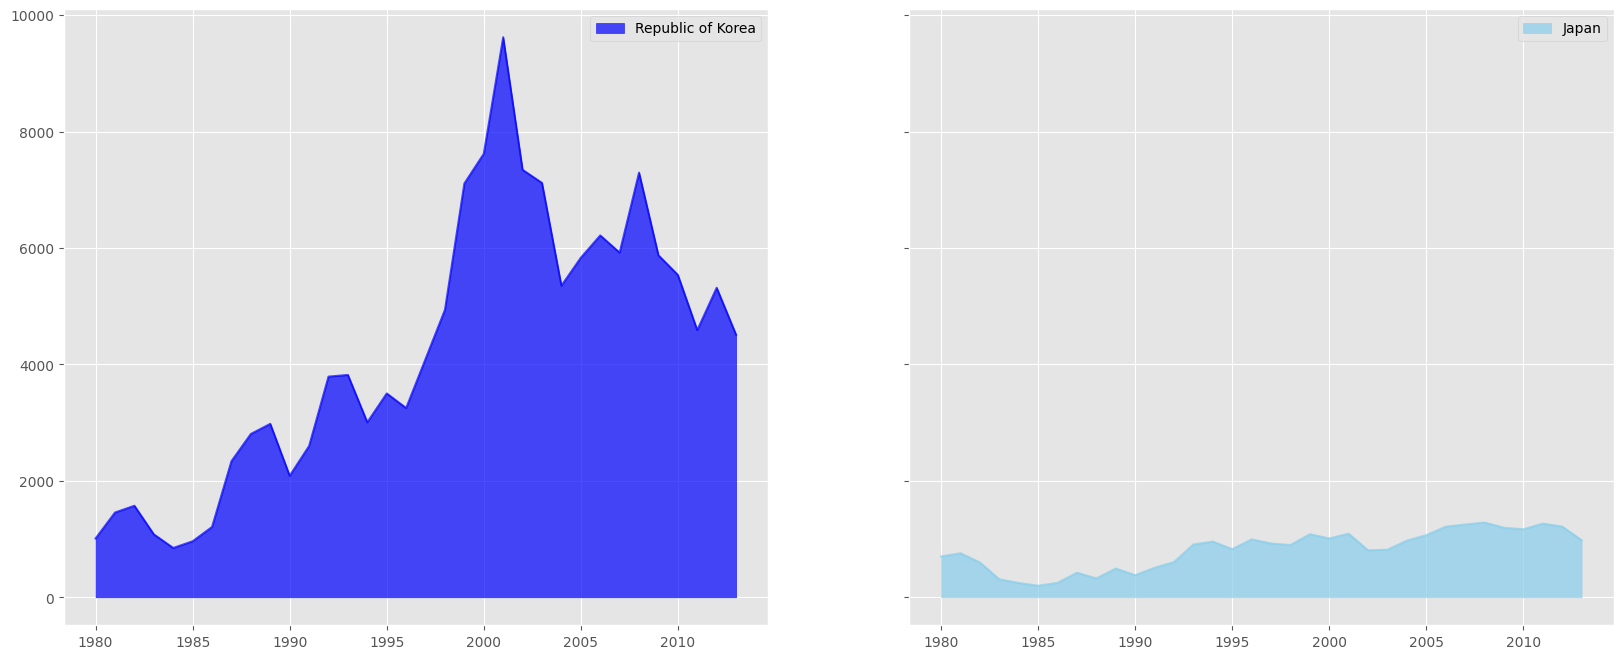

In [16]:
countries = ['Republic of Korea','Japan']
colors = ['blue','skyblue']
df.loc[countries,years].T.plot(kind = 'area',alpha = .7,color =colors,stacked = False
,subplots = True ,figsize = (20,8),layout = (1,2),sharey = True)

## pie chart ##

<AxesSubplot: ylabel='Total'>

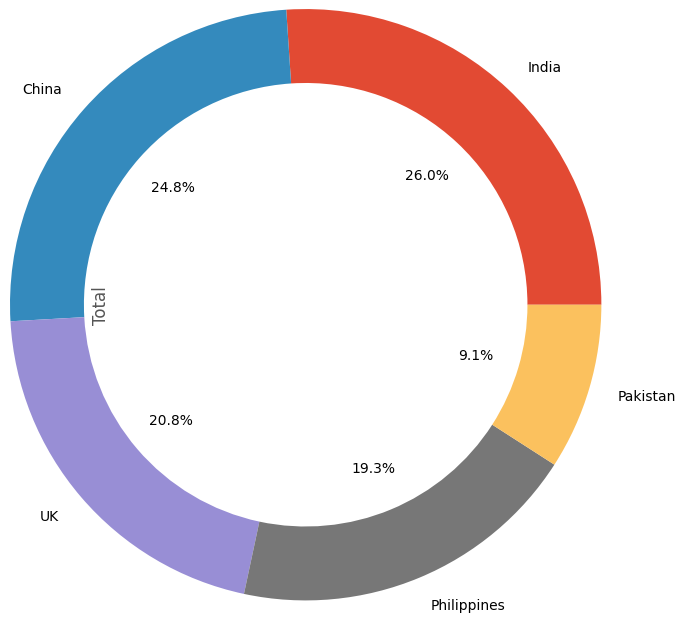

In [17]:
df['Total'].head().plot(kind = 'pie',radius = 2, autopct = '%.1f%%',wedgeprops = {'width':.5},textprops = {'color':'black'})

# Filter

<AxesSubplot: ylabel='Total'>

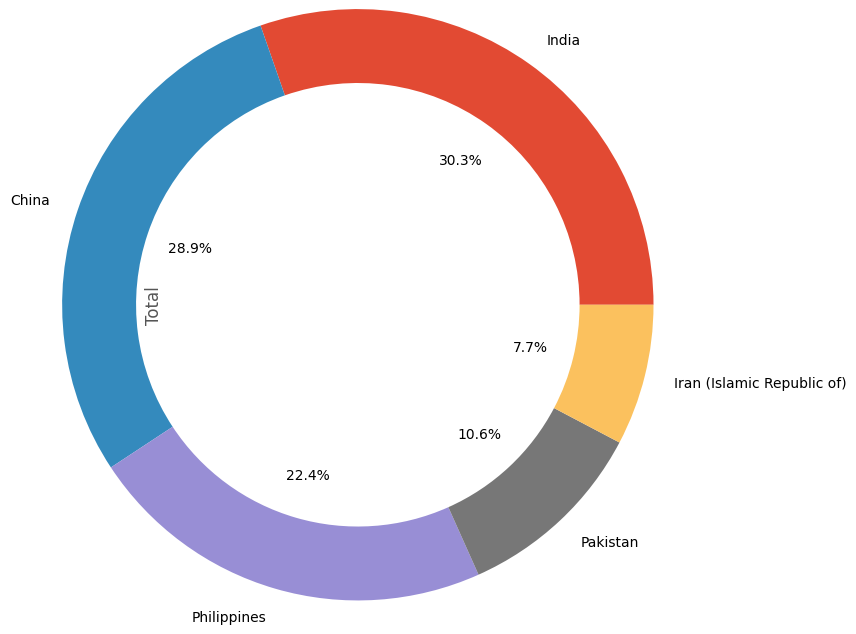

In [18]:
df[df['Continent'] == 'Asia']['Total'].head().plot(kind = 'pie',radius = 2, autopct = '%.1f%%',wedgeprops = {'width':.5},textprops = {'color':'black'})

<AxesSubplot: ylabel='Total'>

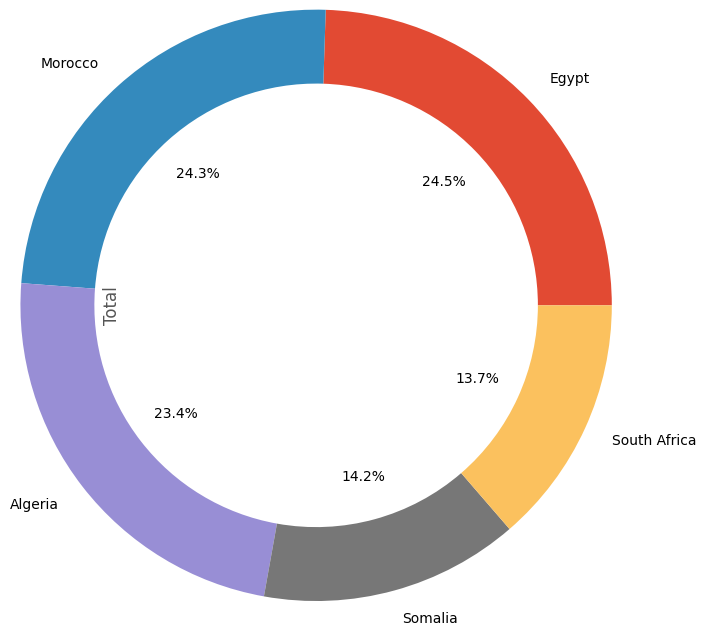

In [19]:
df[df['Continent'] == 'Africa']['Total'].head().plot(kind = 'pie',radius = 2, autopct = '%.1f%%',wedgeprops = {'width':.5},textprops = {'color':'black'})

top ten countries with immigration with status =='developed'

<AxesSubplot: ylabel='Total'>

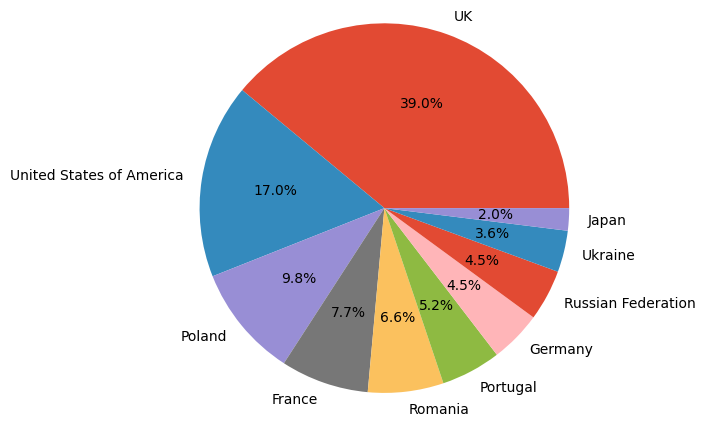

In [25]:
df[df['Status'] == 'Developed regions'].head(10)['Total'].plot(kind = 'pie',radius = 2, autopct = '%.1f%%',textprops = {'color':'black'},figsize = (15,3)) #wedgeprops = {'width':.5}

# groupby

In [26]:
df.groupby(by = 'Continent').sum()

,Region,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,Western Africa,Developing regions,1026,1118,781,474,473,460,718,1470,1305,1663,2365,3266,5794,3734,2375,2821,2561,2137,2292,2389,2867,4067,4174,3369,3686,3626,4807,4021,4226,5532,6242,4663,5555,4331,72745
Asia,Western Asia,Developing regions,8880,8670,8147,7338,7583,5907,7150,10189,11522,11865,13568,14255,13673,21496,19532,18489,23859,22268,21049,30069,35529,36434,31961,36439,36619,42584,33848,28742,30037,29622,38617,36765,34315,34129,691904
Europe,Western Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6280,5827,551500
Latin America and the Caribbean,South America,Developing regions,3198,3692,3575,2860,2666,2938,4649,6174,3924,3946,4945,7124,5991,6065,4181,3935,3282,2847,2253,2358,2482,2965,3283,4318,4566,6424,6535,5357,5452,4652,5218,6503,5868,4152,106431
Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5892,6054,6842,7435,5901,4890,5515,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Oceania,Polynesia,Developing regions,702,705,814,554,389,446,361,523,561,736,1172,1619,1782,1317,1016,674,699,623,479,523,599,799,747,876,930,909,875,1033,1018,1018,933,851,982,1121,23829


In [21]:
cdf = df.groupby(by='Continent')[list(years)].sum()
cdf

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,2075,2495,2871,2566,1967,1565,1552,1263,1021,1055,1276,1818,1685,1800,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775


In [28]:
df.groupby(by = 'Continent')[list(years)].agg(['median','mean','std'])    #more than one functions   
#agg = mean, median ,sum , count , std ,max

1980                              1981  \
                                 median         mean          std  median   
Continent                                                                   
Africa                              5.0    73.166667   188.752683     4.5   
Asia                               12.0   633.163265  1661.461911     6.0   
Europe                             17.0   924.651163  3400.519959    20.0   
Latin America and the Caribbean   114.0   396.393939   720.936064   117.0   
Northern America                 4689.0  4689.000000  6631.247394  5015.0   
Oceania                             0.0   138.714286   275.298839     1.0   

                                                             1982  \
                                        mean          std  median   
Continent                                                           
Africa                             80.796296   215.842831     6.0   
Asia                              700.285714  1744.233272    16.0   
Europe                           1041.906977  3804.699987    10.0   
Latin America and the Caribbean   461.060606   890.283520   146.0   
Northern America                 5015.000000  7092.281015  4537.0   
Oceania                           131.357143   262.275723     0.0   

                                                             1983  \
                                        mean          std  median   
Continent                                                           
Africa                             70.722222   179.364961     3.5   
Asia                              616.612245  1467.264743    16.0   
Europe                            993.488372  3258.495222     9.0   
Latin America and the Caribbean   508.151515   931.359259   124.0   
Northern America                 4537.000000  6416.286932  3550.0   
Oceania                           119.642857   252.528020     0.5   

                                                             1984  \
                                        mean          std  median   
Continent                                                           
Africa                             49.462963   112.049301     6.5   
Asia                              504.000000  1318.140831     7.0   
Europe                            572.976744  1684.401568    11.0   
Latin America and the Caribbean   467.484848   841.861446   142.0   
Northern America                 3550.000000  5020.458146  3330.5   
Oceania                            72.714286   164.784441     0.5   

                                                             1985  \
                                        mean          std  median   
Continent                                                           
Africa                             48.870370   104.221652     4.5   
Asia                              556.612245  1445.529283    17.0   
Europe                            518.302326  1638.375437     6.0   
Latin America and the Caribbean   414.484848   693.568540   165.0   
Northern America                 3330.500000  4710.038269  3271.5   
Oceania                            62.714286   131.166617     0.0   

                                                             1986  \
                                        mean          std  median   
Continent                                                           
Africa                             49.074074   103.179611     7.5   
Asia                              486.734694  1143.511802    13.0   
Europe                            484.744186  1518.592599    11.0   
Latin America and the Caribbean   459.727273   769.882145   209.0   
Northern America                 3271.500000  4626.599669  3537.0   
Oceania                            65.714286   142.005649     0.0   

                                                             1987  \
                                        mean          std  median   
Continent                                                           
Africa                  

<AxesSubplot: ylabel='Frequency'>

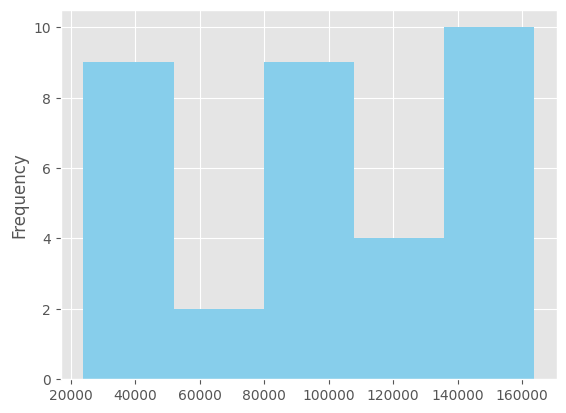

In [35]:
cdf.loc['Asia',years].plot( kind = 'hist' , bins =5,color = 'skyblue')

<AxesSubplot: ylabel='Density'>

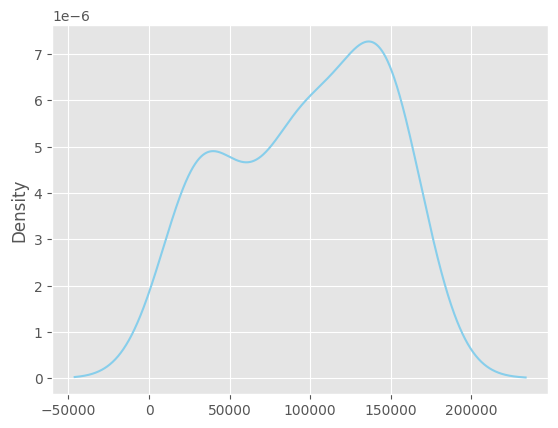

In [38]:
cdf.loc['Asia',years].plot( kind = 'kde' ,color = 'skyblue')

# Boxplot

<AxesSubplot: >

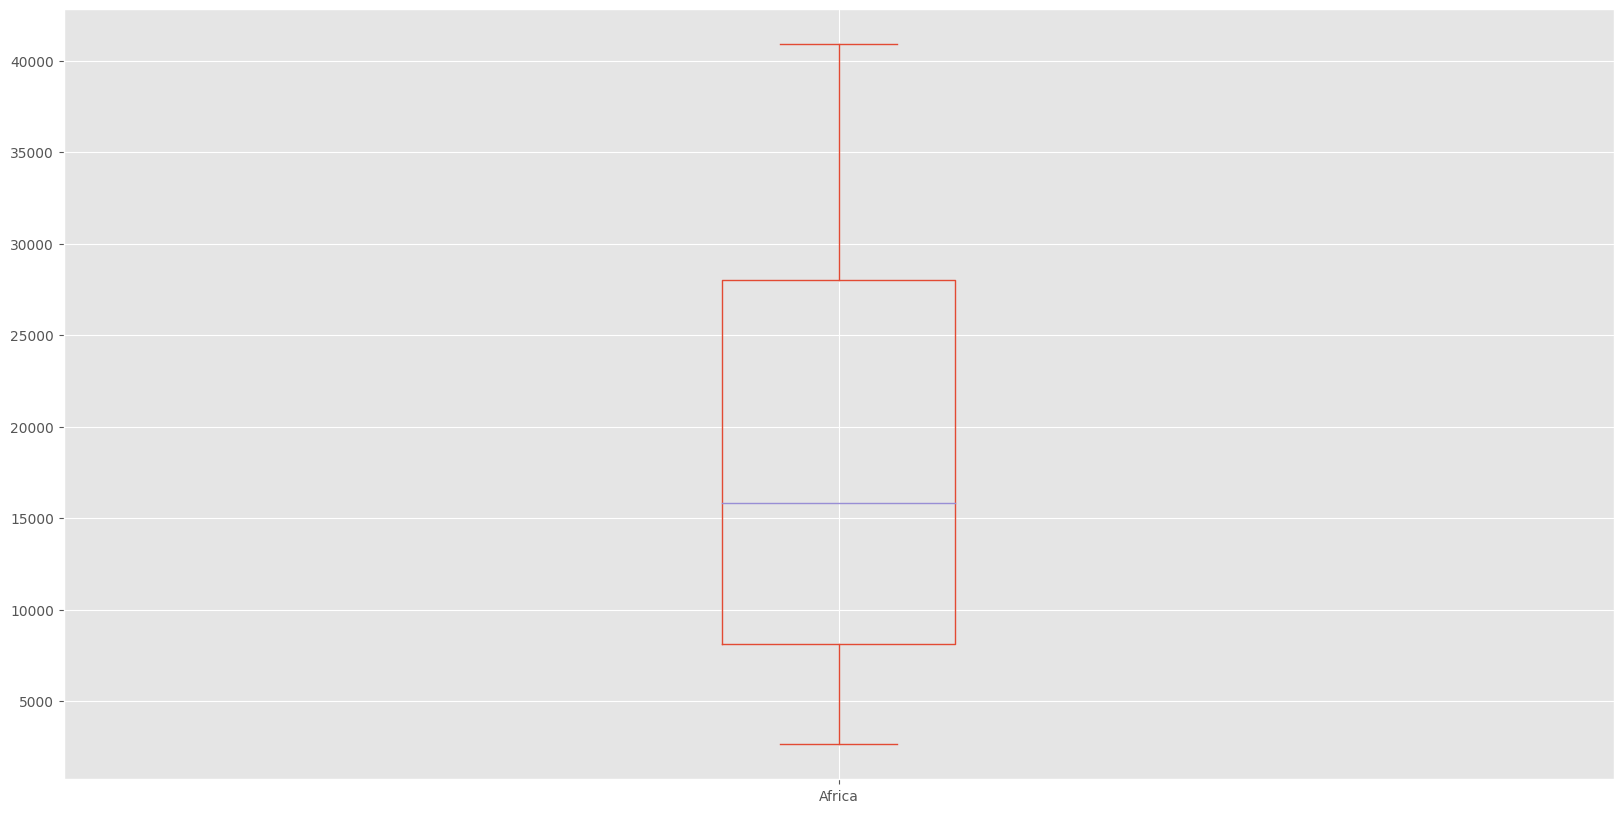

In [40]:
cdf.loc['Africa',years].plot(kind = 'box')

<AxesSubplot: >

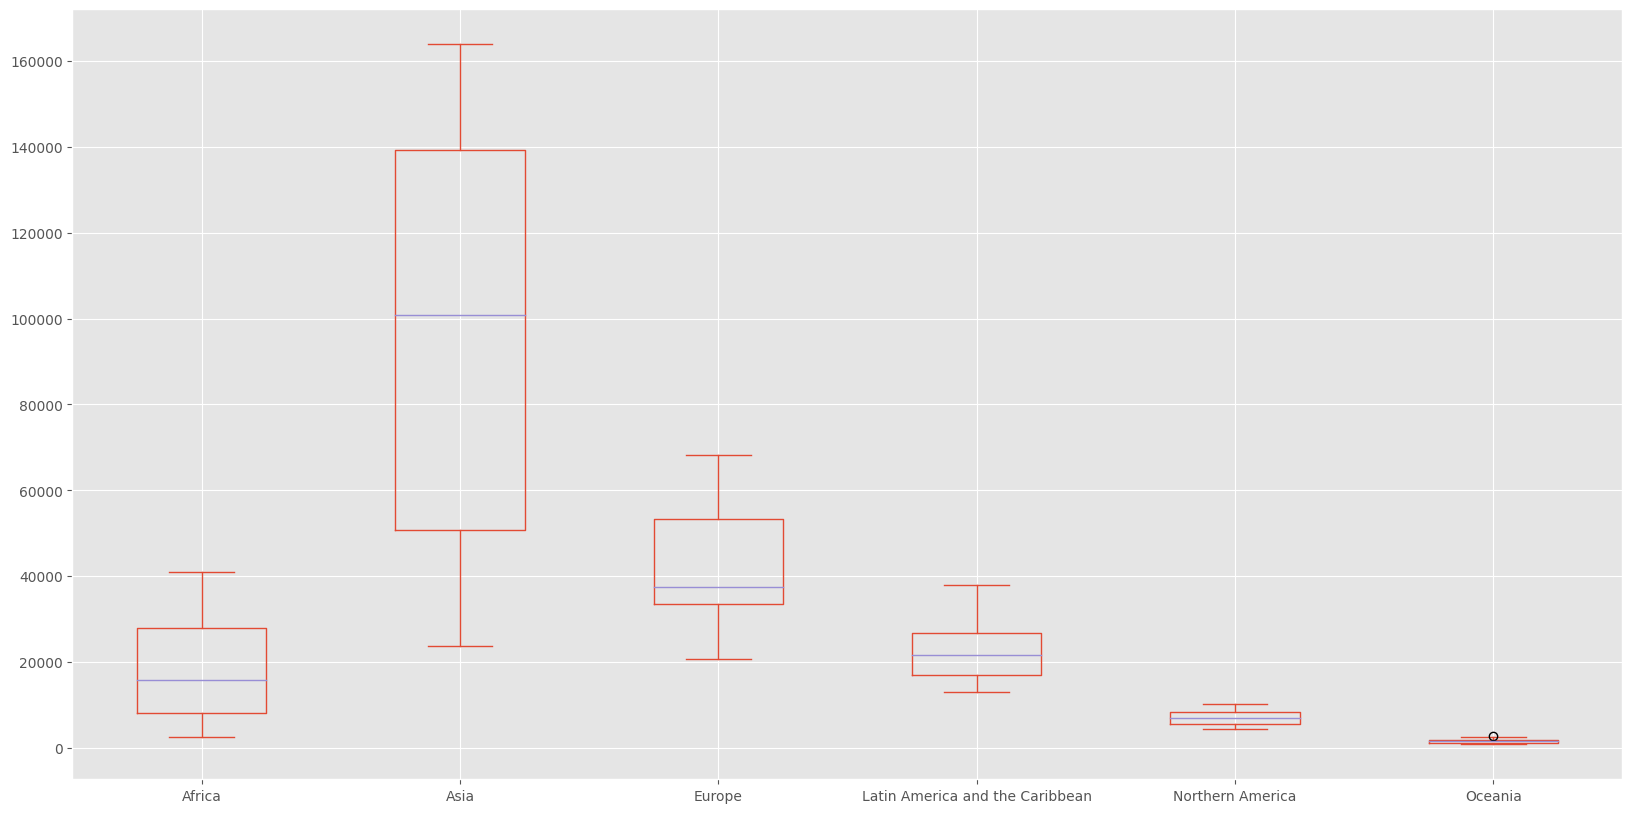

In [41]:
cdf[years].T.plot(kind = 'box',figsize = (20,10))